In [74]:
from keras.models import Sequential
import os
from keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
  
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
import tensorflow as tf
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
train_path = '../input/aug-data/aug_Train'
valid_path = '../input/aug-data/aug_test'

In [75]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.0,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (80, 80),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (80, 80),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 2744 images belonging to 53 classes.
Found 1168 images belonging to 53 classes.


In [76]:
model=Sequential()
model.add(layers.InputLayer(input_shape=(80,80,3)))
model.add(layers.Conv2D(128,(5,5),activation='relu',input_shape=(80,80,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.0025))
model.add(layers.Conv2D(64,(4,4),activation='relu'))

model.summary()
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(53,activation='softmax'))
model.summary()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 76, 76, 128)       9728      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 38, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 38, 38, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 35, 35, 64)        131136    
Total params: 140,864
Trainable params: 140,864
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 76, 76, 128)       9728      
__________________________

In [77]:
hist=model.fit_generator(
     training_set,
    validation_data=test_set,
    steps_per_epoch=45,
      epochs=40)

Epoch 1/40
45/45 [==============================] - 6s 123ms/step - loss: 4.0191 - accuracy: 0.0278 - val_loss: 3.8690 - val_accuracy: 0.0582
Epoch 2/40
45/45 [==============================] - 6s 138ms/step - loss: 3.7075 - accuracy: 0.0503 - val_loss: 3.4376 - val_accuracy: 0.1130
Epoch 3/40
45/45 [==============================] - 6s 130ms/step - loss: 3.2320 - accuracy: 0.1153 - val_loss: 2.9623 - val_accuracy: 0.1943
Epoch 4/40
45/45 [==============================] - 6s 127ms/step - loss: 2.6807 - accuracy: 0.2291 - val_loss: 2.4203 - val_accuracy: 0.2885
Epoch 5/40
45/45 [==============================] - 5s 119ms/step - loss: 2.1437 - accuracy: 0.3493 - val_loss: 1.8956 - val_accuracy: 0.3870
Epoch 6/40
45/45 [==============================] - 6s 125ms/step - loss: 1.8041 - accuracy: 0.4125 - val_loss: 1.5071 - val_accuracy: 0.5051
Epoch 7/40
45/45 [==============================] - 5s 121ms/step - loss: 1.4877 - accuracy: 0.5111 - val_loss: 1.3828 - val_accuracy: 0.5539
Epoch 

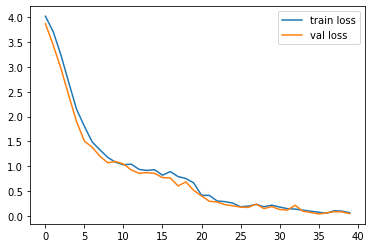

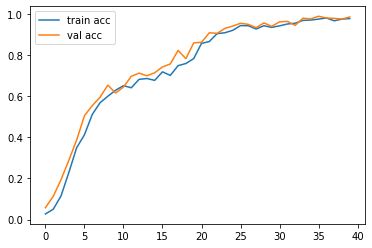

<Figure size 432x288 with 0 Axes>

In [78]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

from keras.models import load_model
model.save('my_model.h5')

In [79]:
from keras.preprocessing.image import load_img
from keras.preprocessing import image


In [80]:
p=os.listdir('../input/aug-data/test')
q='../input/aug-data/test'
len(p)

845

In [81]:
def gettingImages(l,path):
    sample_array=[]
    for i in range(len(l)):
        img_path=path+"/"+l[i]
        img=load_img(img_path,target_size=(80,80))
        
        sample_array.append(image.img_to_array(img))
    return sample_array

In [82]:
test_features=gettingImages(p,q)
test_features=np.array(test_features)
test_features=test_features/255
#test_features

In [83]:
predict=model.predict_classes(test_features)
print(predict)
'''
y_classes = predict.argmax(axis=0)
print(y_classes)

predict_probabilities=model.predict_proba(test_features)
predict_probabilities
'''

[ 4 52 39 39 52 18  0 52  8 31 52 52 52 52  0 52  0  2  1 36 41 52 37 52
 31 52  6 25  1 52 52  0 52  7  7 51 14 19  1  6  0  7 52 15 52 40 47 52
 52 52 31 44 52 18 15 39 25 52 20  0 40 52 29 26 52 52 32 52 10 17  2 52
 52 52 29  7 52 51 36 40 52 52 52 52 52 52 18 52  8 52 52 52 41 45 12 12
  4 50  0 52 12  6 52 39 35 52 29 32 25 10 52 20 32  8 52 52 52 52 45  0
 31  1 17 52 42 25  0 52  4 52 18  7 32 15 52 52 10 52 14 28  0 45 10 52
 52  6 52  8  7 29 18 29 29 52 52 29 52 52 26 47 47 52 52 52  4  1 52  1
 52 25 52 14 29 49 52  0 15  1 17 37 52 47 52 42 40 30 52 14  2 24  7 52
 52 31 10 52 52 52 52  6 31 51  7 52 52 25 25 37 52 52 52 52 52  8 52 15
 28 31 52 32  7 51 43 44 52 52 52 37 49 52  7 52 25 52 30  6 52 32 50 43
  6 52 52 52 52 47 29 52 14 51 52  7 49 52  7 52 52  0 52 45  7  6 25 52
 52 31 52  7 42 26 32 52 43 52 52  0 20 19 40 45 17 52 52  1 15 52 52 52
 52 45 52 43 52 39 51 43 28 52 18 52 25 52 52 52 29 52 52 52  0 31 45 25
 24  1 28 32 33 52 52  6 52 52 52 31 52 52 52 32 17

'\ny_classes = predict.argmax(axis=0)\nprint(y_classes)\n\npredict_probabilities=model.predict_proba(test_features)\npredict_probabilities\n'

In [84]:
prob=[]
probabilities = model.predict_proba(test_features)
for i in range(len(probabilities)):
    m=max(probabilities[i])
    r=round(m,2)
    prob.append(r)
prob

[1.0,
 0.97,
 1.0,
 1.0,
 1.0,
 0.99,
 1.0,
 1.0,
 1.0,
 0.88,
 1.0,
 1.0,
 1.0,
 0.97,
 1.0,
 1.0,
 1.0,
 0.99,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.97,
 1.0,
 1.0,
 1.0,
 0.97,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.76,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.97,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.97,
 1.0,
 1.0,
 0.97,
 0.99,
 0.92,
 1.0,
 1.0,
 0.97,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.97,
 1.0,
 1.0,
 1.0,
 0.98,
 1.0,
 0.99,
 0.97,
 0.97,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.97,
 1.0,
 1.0,
 0.97,
 0.99,
 1.0,
 1.0,
 0.97,
 0.97,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.97,
 1.0,
 1.0,
 1.0,
 1.0,
 0.95,
 0.97,
 0.51,
 0.68,
 1.0,
 0.98,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.97,
 0.97,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.97,
 1.0,
 1.0,
 0.99,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.98,
 1.0,
 0.76,
 0.71,
 1.0,
 1.0,
 0.98,
 0.97,
 0.97,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99,
 0.51,
 0.51,
 0.97,
 1.0,
 1.0,
 0.97,
 0.97,
 1.0,


In [86]:
a=os.listdir('../input/aug-data/aug_Train')
print(a)
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
lb.fit(a)

['7S', '6S', '9H', '6D', '2H', '7H', '4D', 'AS', 'AC', '2C', '7D', '3H', 'KD', '5H', '4S', '10H', 'KC', '10C', 'JH', '6C', '8S', '4C', '8H', 'JD', '3C', 'JC', '5S', 'QH', 'QS', '6H', '7C', '2D', '4H', 'AH', 'JS', '8D', 'KH', '9D', '3D', '2S', 'none', 'AD', '8C', '9C', '3S', '5C', 'QC', '10D', '10S', '9S', 'KS', '5D', 'QD']


LabelEncoder()

In [87]:
lb.classes_
answers=lb.inverse_transform(predict)
answers

array(['2C', 'none', 'AS', 'AS', 'none', '5H', '10C', 'none', '3C', '8S',
       'none', 'none', 'none', 'none', '10C', 'none', '10C', '10H', '10D',
       'AC', 'JD', 'none', 'AD', 'none', '8S', 'none', '2H', '7D', '10D',
       'none', 'none', '10C', 'none', '2S', '2S', 'QS', '4H', '5S', '10D',
       '2H', '10C', '2S', 'none', '4S', 'none', 'JC', 'KS', 'none',
       'none', 'none', '8S', 'KC', 'none', '5H', '4S', 'AS', '7D', 'none',
       '6C', '10C', 'JC', 'none', '8D', '7H', 'none', 'none', '9C',
       'none', '3H', '5D', '10H', 'none', 'none', 'none', '8D', '2S',
       'none', 'QS', 'AC', 'JC', 'none', 'none', 'none', 'none', 'none',
       'none', '5H', 'none', '3C', 'none', 'none', 'none', 'JD', 'KD',
       '4C', '4C', '2C', 'QH', '10C', 'none', '4C', '2H', 'none', 'AS',
       '9S', 'none', '8D', '9C', '7D', '3H', 'none', '6C', '9C', '3C',
       'none', 'none', 'none', 'none', 'KD', '10C', '8S', '10D', '5D',
       'none', 'JH', '7D', '10C', 'none', '2C', 'none', '5H', '

In [88]:
import pandas as pd
df1=pd.DataFrame(p,columns=['imageFileName'])
df2=pd.DataFrame(answers,columns=['predictedLable'])
df3=pd.DataFrame(prob,columns=['predictedProb'])
output=pd.concat([df1,df2,df3],axis=1)

output

,imageFileName,predictedLable,predictedProb
0,1598087464_32_3.png,2C,1.00
1,1598087464_186_4.png,none,0.97
2,1598087464_78_0.png,AS,1.00
3,1598087464_33_2.png,AS,1.00
4,1598087464_140_2.png,none,1.00
...,...,...,...
840,1598087464_96_0.png,4C,1.00
841,1598087464_211_1.png,AD,1.00
842,1598087464_64_1.png,KS,1.00
843,1598087464_223_0.png,none,0.97


In [ ]:
output.to_csv('submission.csv')